<a href="https://colab.research.google.com/github/mariruwanjiru/Insurance-Prediction/blob/main/Insurance_Prediction_(Team_Zeal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [208]:
#load the dataset
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
variables = pd.read_csv("VariableDescription.csv")

In [209]:
#Observe the shape of our dataset
print('train datashape :',train_data.shape)
print('test datashape :', test_data.shape)


train datashape : (7160, 14)
test datashape : (3069, 13)


In [210]:
#inspect the train data
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [211]:
#check for missing values
print('missing values:', train_data.isnull().sum())

missing values: Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64


In [212]:
test_new =test_data.fillna(0)
print(test_new)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H11920               2013        1.000000            0   
1         H11921               2016        0.997268            0   
2          H9805               2013        0.369863            0   
3          H7493               2014        1.000000            0   
4          H7494               2016        1.000000            0   
...          ...                ...             ...          ...   
3064      H11583               2015        1.000000            0   
3065      H11720               2012        1.000000            0   
3066      H11721               2012        1.000000            0   
3067      H12408               2013        1.000000            0   
3068       H9021               2012        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   V               N      O          R               300.0   
1                   V    

In [213]:
# lets deal with the missing values
train_new =train_data.fillna(0)
print(train_new)


     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U               290.0   
1                   V    

In [214]:
print('missing values:', train_new.isnull().sum())

missing values: Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


In [215]:
train_new.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [216]:
variables

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


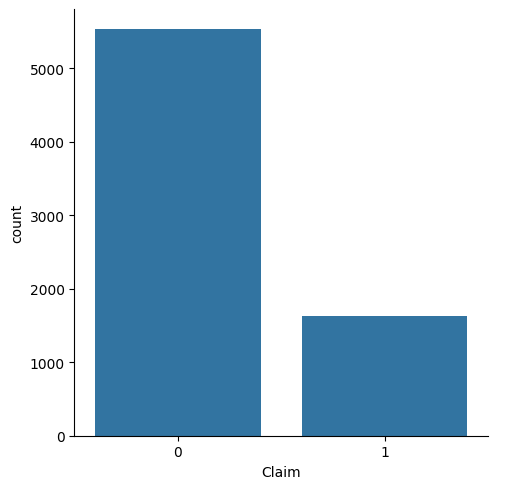

In [217]:
# explore target distribution
sns.catplot(x="Claim", kind= "count", data = train_new)

In [218]:
#understand the dataset
#show some more information about the dataset
print(train_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB
None


DATA PREPARATION FOR MACHINE LEARNING
PERFORM DATA CLEANING AND PREPROCESSING
Building training sets - 3%
Cleaning and organizing - 60%
Collecting data sets - 19%
Mining data for patterns -9%
Refining algorithms - 4%
other 5%

In [219]:
#seperate the independent variables and target from train data
# import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [220]:
#convert target label to numerical Data
#this part is not necessary since it is already in numerical form
#used it for the purpose of learning
#instantiate
le = LabelEncoder()
#fit the encoder to the data(learning the unique categories and mapping the no. to integers and after fitting it immediately transforms the original categories to their corresponding numerical labels)
train_new.loc[:, "Claim"] = le.fit_transform(train_new["Claim"])

In [221]:
#seperate the training features from target
x_train = train_new.drop(["Claim"], axis = 1)
y_train = train_new["Claim"]
x_test = test_new
print(y_train)

0       0
1       0
2       0
3       0
4       0
       ..
7155    0
7156    1
7157    0
7158    0
7159    0
Name: Claim, Length: 7160, dtype: int64


In [222]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical and numerical columns
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = x_train.select_dtypes(include=['number']).columns

# Impute missing values
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

x_train[numerical_cols] = numerical_imputer.fit_transform(x_train[numerical_cols])
x_train[categorical_cols] = categorical_imputer.fit_transform(x_train[categorical_cols])
x_test[numerical_cols] = numerical_imputer.transform(x_test[numerical_cols])
x_test[categorical_cols] = categorical_imputer.transform(x_test[categorical_cols])

# Convert all categorical columns to string type before one-hot encoding
# This ensures uniformity of data types for the encoder
x_train[categorical_cols] = x_train[categorical_cols].astype(str)
x_test[categorical_cols] = x_test[categorical_cols].astype(str)

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_train = pd.DataFrame(encoder.fit_transform(x_train[categorical_cols]))
encoded_test = pd.DataFrame(encoder.transform(x_test[categorical_cols]))


# Align indices
encoded_train.index = x_train.index
encoded_test.index = x_test.index

# Drop the original categorical columns and concatenate encoded columns
x_train = x_train.drop(categorical_cols, axis=1)
x_test = x_test.drop(categorical_cols, axis=1)

x_train = pd.concat([x_train, encoded_train], axis=1)
x_test = pd.concat([x_test, encoded_test], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


WE NEED TO SELECT ONLY IMPORTANT FEATURES THAT CAN INCREASE THE PERFORMANCE OF A MODEL

MODEL BUILDING AND EXPERIMENTS.
A portion of the train dataset will be used to evaluate our models and find the best one that performs well before using it in the test dataset

In [223]:
#split datasets into training and testing subsets that performing cross-validation and selecting hyperparameters for models
import sklearn.model_selection

In [225]:
def preprocessing_data(data):
  # Perform your preprocessing steps here
  # For example:

  # data = data.fillna(method='ffill')
  return data

# Preprocess the training data
processed_train = preprocessing_data(x_train)
processed_test = preprocessing_data(x_test)



In [226]:
#split train_data
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val =  train_test_split(processed_train,y_train,stratify = y_train,test_size =0.3, random_state = 42)
#y_train = Target(dependent)variable
#processed_train= The preprocessed feature,datset(independent variable)
#stratify = useful in classification problems
#test_size = 0.3(30% of data is used for validation and 70% for training
#random_state = 42 (ensures reproducibility by fixing the random seed for shuffling the data)

AUC: 0.68


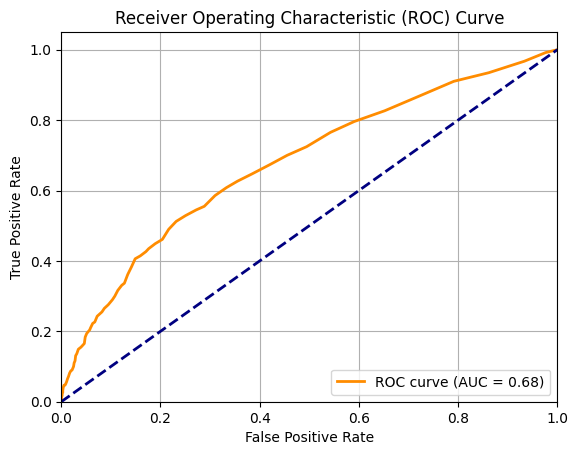

In [227]:
# train the model
# Train a binary classifier (RandomForest)
# Convert all column names to strings
x_train.columns = x_train.columns.astype(str)
# Convert all column names to strings
x_val.columns = x_val.columns.astype(str)

# Now, try fitting the model again
clf.fit(x_train, y_train)
# Now, try fitting the model again
clf.fit(x_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

# Predict probabilities for the positive class
y_pred = clf.predict_proba(x_val)[:, 1]

# ROC and AUC
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

XGBoost model performs well on predicting class 0 and performs poorly on predicting class 1 , it may be caused by the imbalanced of data provided(the target variable has more 'No' values than 'Yes' values .You can learn the best way with imbalanced data here.
One way to increase the model performance is by applying the grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid

In [228]:
#determine the optimal threshold
# Determine optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal threshold: {optimal_threshold:.2f}')


Optimal threshold: 0.19


In [229]:
#evaluate the model performance
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Evaluate performance at the optimal threshold
y_pred_optimal = [1 if prob >= optimal_threshold else 0 for prob in y_pred]
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred_optimal, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the confusion matrix
cm = confusion_matrix(y_val, y_pred_optimal)
print("Confusion Matrix:")
print(cm)


Precision: 0.40
Recall: 0.51
F1 Score: 0.45
Confusion Matrix:
[[1274  384]
 [ 239  251]]


In [230]:
clf.score(x_val,y_val)

0.7756052141527002

In [231]:
# refine the model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],  # Reduced the range to avoid long computation
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1)  # Use all processors

# Fit the model
grid_search.fit(x_train, y_train)

# Extract the best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_y_probs = best_model.predict_proba(x_val)[:, 1]
best_auc_score = roc_auc_score(y_val, best_y_probs)
print(f"Best model AUC: {best_auc_score:.2f}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best model AUC: 0.68


In [232]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
best_y_probs = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150)

best_y_probs.fit(x_train, y_train)
y_pred = best_y_probs.predict(x_val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.22811918063314707


In [233]:
#validate the model
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Mean AUC: {cv_scores.mean():.2f}")




Cross-validated AUC scores: [0.71270438 0.68372206 0.68696227 0.69470164 0.69606793]
Mean AUC: 0.69


In [234]:
#deploy the model
import joblib

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')

# Load the model from the file
loaded_model = joblib.load('best_model.pkl')

# Ensure all column names in x_test are strings
processed_test.columns = processed_test.columns.astype(str)  # Convert column names to strings

# Make predictions with the loaded model
test_predictions = loaded_model.predict_proba(processed_test)
print(f"Predictions: {test_predictions}")

Predictions: [[0.97333333 0.02666667]
 [0.97333333 0.02666667]
 [0.98666667 0.01333333]
 ...
 [0.83333333 0.16666667]
 [0.83333333 0.16666667]
 [0.86666667 0.13333333]]


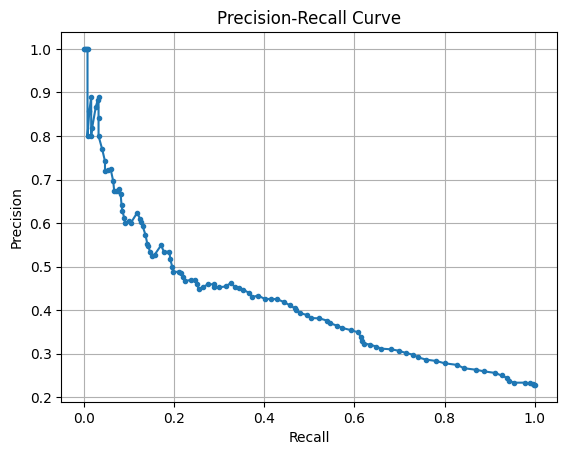

Precision-Recall AUC: 0.41


In [235]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve

# Handle imbalanced data with SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train model on resampled data
best_model.fit(x_resampled, y_resampled)
resampled_y_probs = best_model.predict_proba(x_val)[:, 1]

# Calculate and plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, resampled_y_probs)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Calculate Precision-Recall AUC
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")

In [248]:
processed_test.shape




(3069, 8494)

In [251]:
# If you need to save the predictions
output = pd.DataFrame({'Customer Id': test_data['Customer Id'],
                       'Predicted': test_predictions[:, 1]}) # Select the probabilities for the positive class (index 1)
output.to_csv('First Submission6.csv', index=False)